# What is the Debt Service Coverage Ratio for this property?

### Methodology
1. Preprocess annual calculations
2. Create functions for mortgage payments
3. Calculate debt service coverage ratio (DSCR)
4. Plot pie graph

### Import Libraries and Data

In [9]:
import matplotlib.pyplot as plt  

#define expenses
vacancy_rate = 0.02
management_fee_rate = 0.10
maintenance_fee_rate = 0.03
property_taxes = 630 #monthly
insurance = 150 #monthly
advertising_fee = 0.01
gross_rental_income = 3702

#define loan details
loan_amount = 300000  # loan amount in dollars
annual_interest_rate = 6.27  # annual interest rate in percent
loan_term_years = 30  # loan term in years

## Calculate Annual Rental Income and Operating Expenses

In [10]:
#calculate each expense
vacancy_expense = gross_rental_income * vacancy_rate
management_expense = gross_rental_income * management_fee_rate
maintenance_expense = gross_rental_income * maintenance_fee_rate
advertising_expense = gross_rental_income * advertising_fee
vacancy_expense = gross_rental_income * vacancy_rate
total_operating_expenses = (vacancy_expense + management_expense + maintenance_expense + advertising_expense + property_taxes + insurance)

monthly_effective_rental_income = gross_rental_income - vacancy_expense
annual_effective_rental_income = monthly_effective_rental_income * 12
annual_operating_expenses = total_operating_expenses * 12
print(f"Monthly Effective Rental Income: ${monthly_effective_rental_income:.2f}")
print(f"Annual Effective Rental Income (AERI): ${annual_effective_rental_income:.2f}")
print(f"Annual Operating Expenses: ${annual_operating_expenses:.2f}")

Monthly Effective Rental Income: $3627.96
Annual Effective Rental Income (AERI): $43535.52
Annual Operating Expenses: $16467.84


### Create Functions to calculate mortgage payment and annual debt service

In [11]:
def calculate_monthly_mortgage_payment(loan_amount, annual_interest_rate, loan_term_years):
    # Convert annual interest rate to a monthly interest rate
    monthly_interest_rate = annual_interest_rate / 12 / 100

    # Calculate total number of payments
    total_payments = loan_term_years * 12

    # Calculate the monthly mortgage payment using the formula
    monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** total_payments) / ((1 + monthly_interest_rate) ** total_payments - 1)

    return monthly_payment

def calculate_annual_debt_service(loan_amount, annual_interest_rate, loan_term_years):
    # Calculate monthly mortgage payment
    monthly_payment = calculate_monthly_mortgage_payment(loan_amount, annual_interest_rate, loan_term_years)

    # Calculate annual debt service (monthly payment times 12)
    annual_debt_service = monthly_payment * 12

    return annual_debt_service

### Execute Functions To Complete Mortgage and Debt Service Calculation

In [12]:
monthly_payment = calculate_monthly_mortgage_payment(loan_amount, annual_interest_rate, loan_term_years)
annual_debt_service = calculate_annual_debt_service(loan_amount, annual_interest_rate, loan_term_years)

print(f"Monthly Mortgage Payment: ${monthly_payment:.2f}")
print(f"Annual Debt Service: ${annual_debt_service:.2f}")

Monthly Mortgage Payment: $1851.06
Annual Debt Service: $22212.67


### Calculate Debt Service Coverage Ratio (DSCR)

In [13]:
net_operating_income = gross_rental_income - total_operating_expenses
annual_noi = net_operating_income * 12
def calculate_dscr(annual_noi, annual_debt_service):
  dscr = annual_noi / annual_debt_service
  return dscr

dscr = calculate_dscr(annual_noi, annual_debt_service)

# Output results
print(f"Net Operating Income (Annual): ${annual_noi:.2f}")
print(f"Debt Service Coverage Ratio (DSCR): {dscr:.2f}")

Net Operating Income (Annual): $27956.16
Debt Service Coverage Ratio (DSCR): 1.26


## Create A Pie Chart Showcasing Debt Service Coverage Ratio

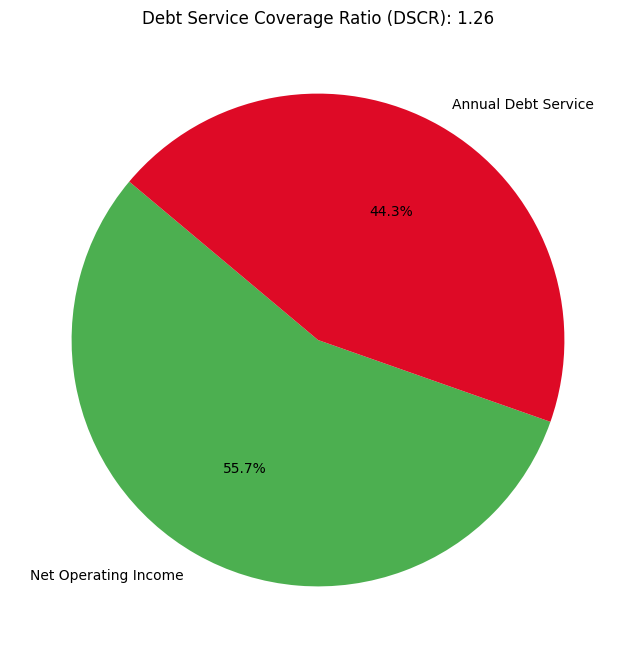

In [14]:
# Create data for the pie chart
labels = ['Net Operating Income', 'Annual Debt Service']
sizes = [annual_noi, annual_debt_service]
colors = ['#4CAF50', '#de0a26']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f'Debt Service Coverage Ratio (DSCR): {dscr:.2f}')
plt.show()